In [1]:
import sys
!{sys.executable} -m pip install numpy numexpr

from os import walk
import warnings

from PIL import Image

from numpy import asarray, empty_like, empty
import numpy as np

from shift import find_best_shift_minimize
from image import to_grayscale
from pack import starpack_unaligned

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [2]:
dir = "/Users/kornellugosi/Star Photography workdir/23"

In [3]:
files = []
for (dirpath, dirnames, filenames) in walk(dir):
    files.extend([dirpath + "/" +filename for filename in filenames if filename.endswith(".jpg") or filename.endswith(".png")] )
    break

In [4]:
loaded_images = []
for file in files:
    loaded_images.extend([asarray(Image.open(file))])

In [5]:
%%time
df = starpack_unaligned(loaded_images[0], [files[0], files[1], files[2]])

CPU times: user 234 ms, sys: 45.3 ms, total: 280 ms
Wall time: 484 ms


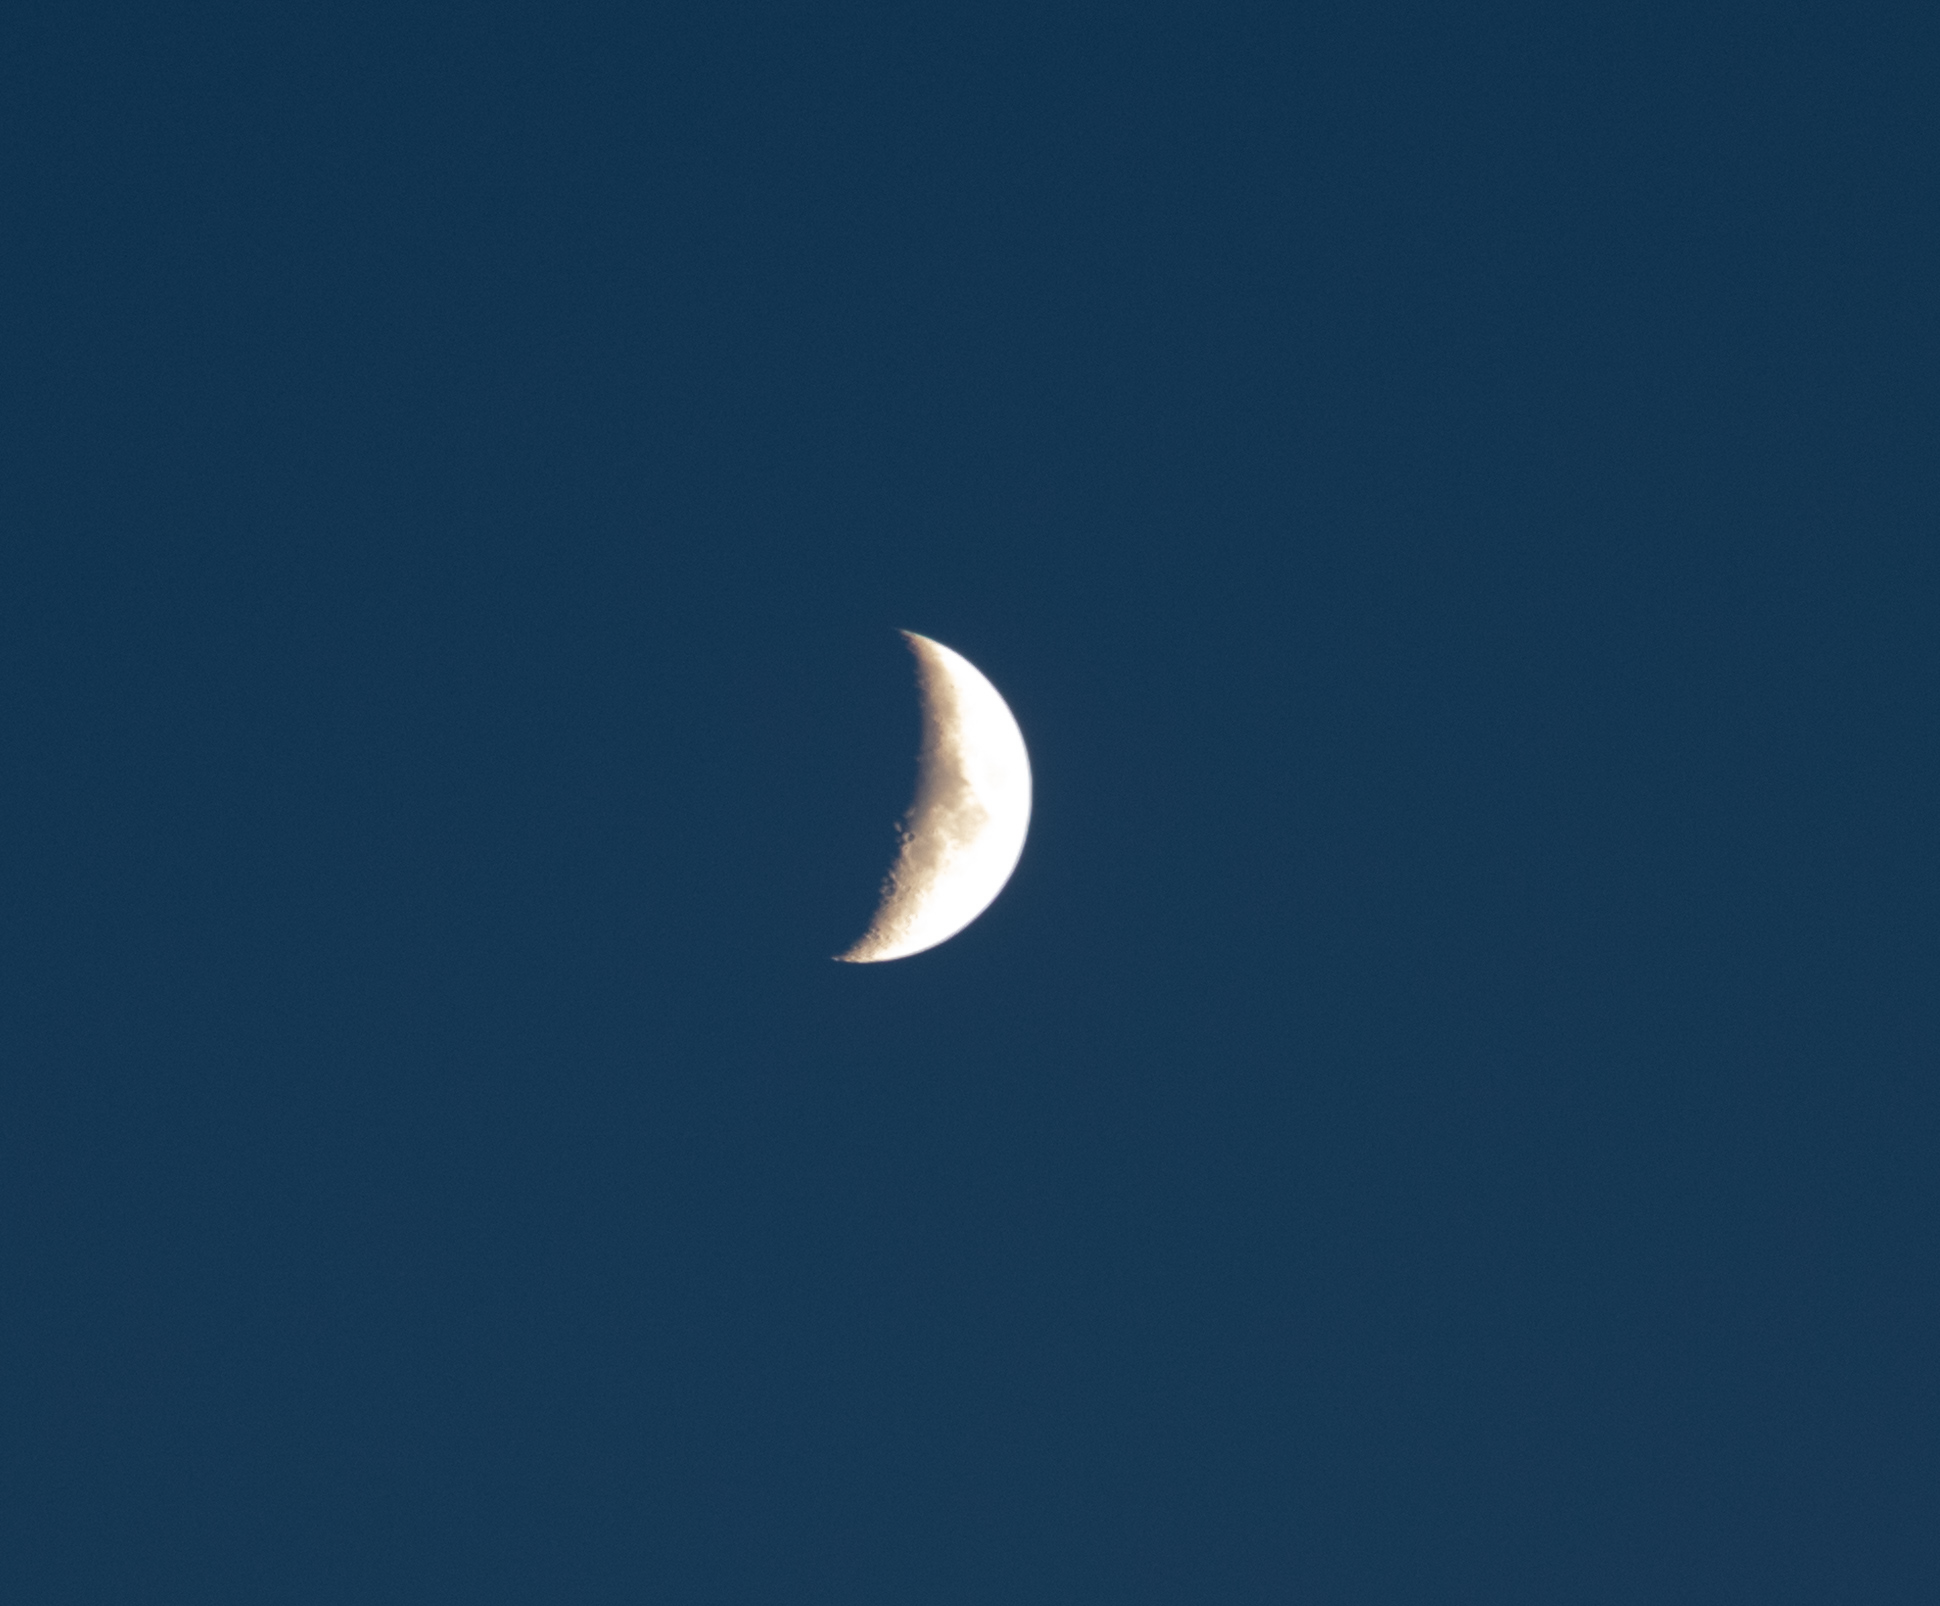

In [6]:
Image.fromarray(df.astype(np.uint8))